# MNIST データセットによる重み初期値の比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from common.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

===========iteration:0===========
std=0.01:2.302562248373689
Xavier:2.308128427043921
He:2.4293565055870165
===========iteration:100===========
std=0.01:2.3031170134715016
Xavier:2.2415383565349867
He:1.6761722169559143
===========iteration:200===========
std=0.01:2.3030721785995336
Xavier:2.0895035043815042
He:0.886078352479953
===========iteration:300===========
std=0.01:2.30149070793599
Xavier:1.6544212188781389
He:0.6180312525190912
===========iteration:400===========
std=0.01:2.3016160705771895
Xavier:1.2145877721568588
He:0.5216068326775747
===========iteration:500===========
std=0.01:2.3024159376933144
Xavier:0.7906328320298319
He:0.3628537952181893
===========iteration:600===========
std=0.01:2.300643093619547
Xavier:0.668533587685753
He:0.4526990140091084
===========iteration:700===========
std=0.01:2.2954404898937804
Xavier:0.4949500775135327
He:0.27728895572676737
===========iteration:800===========
std=0.01:2.296718481365592
Xavier:0.49645987599573166
He:0.35402395526728947

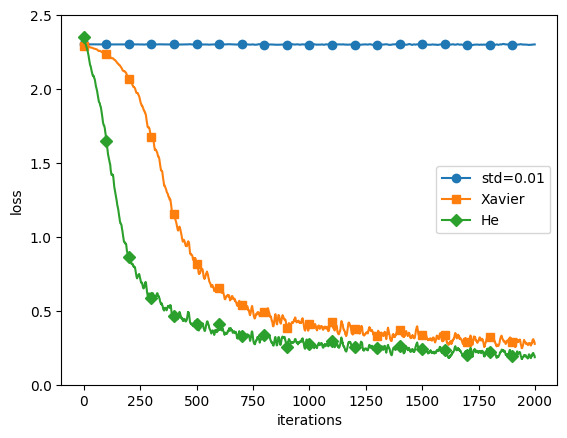

In [2]:
# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()